In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets

### Выборка датасета 20 newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
print (newsgroups['data'][0])
print (newsgroups.data[0])


I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [7]:
newsgroups.data

['i was wond if anyon out ther could enlight me on thi car i sawth oth day it was a door sport car look to be from the lat sear s it was cal a bricklin the door wer real smal in additionth front bump was sep from the rest of the body thi is al i know if anyon can tellm a model nam engin spec yearsof produc wher thi car is mad hist or whatev info youhav on thi funky look car pleas email',
 'a fair numb of brav soul who upgrad their si clock oscil havesh their expery for thi pol pleas send a brief mess detailingyo expery with the proc top spee attain cpu rat speedad on card and adapt heat sink hour of us per day floppy diskfunct with  and  m floppy ar espec requested wil be summ in the next two day so pleas ad to the networkknowledg bas if you hav don the clock upgrad and hav answ thispol thank',
 'wel folk my mac plu fin gav up the ghost thi weekend afterstart lif as a k way back in   sooo im in the market for anew machin a bit soon than i intend to beim look into pick up a powerbook  o

### Предобработка

 Переведем во всех документах все буквы в нижний регистр. Удалим во всех документах символы, не являющиеся буквами. Разобьем каждый документ на термы по пробельным символам. Сделаем стэмминг.

In [5]:
import nltk
import re
# import tqdm
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
regex = re.compile('[^a-z A-Z]')
i = 0
for doc in newsgroups.data:
    doc = doc.lower()
    doc = regex.sub('', doc)
    newsgroups.data[i] = ' '.join([st.stem(word) for word in doc.split(' ')])
    i += 1

In [8]:
doc

'stolen from pasadena between  and  pm on blue and white honda cbrrr california plate kg cbr   serial numberjhscxpm engine number no turn signals or mirrors lights taped over for track riders sessionat willow springs tomorrow  guess ill miss it  help me find my baby'

### Bag Of Words

In [9]:
bow = sklearn.feature_extraction.text.CountVectorizer()
Train_bow = bow.fit_transform(newsgroups.data)

In [11]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

####  Оценим точность метода k ближайших соседей при помощи кросс-валидации с 3 фолдами

In [10]:
from sklearn import grid_search
svr=sklearn.neighbors.KNeighborsClassifier()
parameters = {"n_neighbors":[5,10,25], "metric":['cosine', 'minkowski'], "weights":['uniform', 'distance']}
clf = grid_search.GridSearchCV(svr, parameters, cv=3)
clf.fit(Train_bow, newsgroups.target)
print(clf.best_params_)
print(clf.best_score_)

/home/yana/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/yana/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}
0.28513346296623654


### TF-IDF

Произведем tf-idf преобразование

$$\operatorname {tf-idf}(t,d,D)=\operatorname {tf}(t,d)\times \operatorname {idf}(t,D)$$

$${\displaystyle \mathrm {tf} (t,d)={\frac {n_{t}}{\sum _{k}n_{k}}}}$$

$${\displaystyle \mathrm {idf} (t,D)=\log {\frac {|D|}{|\{\,d_{i}\in D\mid t\in d_{i}\,\}|}}} ,$$

In [12]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer()
Train_tfidf = tfidf.fit_transform(newsgroups.data)

####  Оценим точность метода k ближайших соседей при помощи кросс-валидации с 3 фолдами

In [13]:
from sklearn import grid_search
svr=sklearn.neighbors.KNeighborsClassifier()
parameters = {"n_neighbors":[5,10,25], "metric":['cosine', 'minkowski'], "weights":['uniform', 'distance']}
clf = grid_search.GridSearchCV(svr, parameters, cv=3)
clf.fit(Train_tfidf, newsgroups.target)
print(clf.best_params_)

{'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}


In [14]:
print(clf.best_params_)
print(clf.best_score_)

{'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}
0.5423369277001945


Как можно улучшить качество?
- Попробовать удалить стоп слова
- Использовать лемматизатор вместо стэмминга
- Попробовать использовать другие классификаторы

### Загрузим тестовую выборку.

In [15]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

In [16]:
import nltk
import re
# import tqdm
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
regex = re.compile('[^a-z A-Z]')
i = 0
for doc in newsgroups_test.data:
    doc = doc.lower()
    doc = regex.sub('', doc)
    newsgroups_test.data[i] = ' '.join([st.stem(word) for word in doc.split(' ')])
    i += 1

#### Примените лучший алгоритм к тестовой выборке

In [17]:

Test_tfidf = tfidf.transform(newsgroups_test.data)

In [18]:
svr = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'cosine', weights = 'distance')
svr.fit(Train_tfidf, newsgroups.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [19]:
answ = svr.predict(Test_tfidf)
answ_true = newsgroups_test.target
np.mean(answ_true == answ)

0.4803505045140733

#### Выведем несколько документов из тестовой выборки, на которых были допущены ошибки

In [23]:
np.where(answ_true != answ)

(array([   0,    1,    2, ..., 7529, 7530, 7531]),)

In [83]:
ind=np.where(answ_true != answ)
ind=np.array(ind[0])
random_ind = np.random.randint(0,ind.shape[0],(10))
for i in random_ind:
    img=newsgroups_test.data[ind[i]]
    print(img)
    print(" ")

nic littl real compact cream col  extern modem goodf the mac or ibm  i wil throw in a cabl for an extr  or soif you ar interest email me an off
 
wait a minut i could swear that varsho is whit
 
what is the healthiest way to deal with earwax  should on just leaveit in yo ear and not mess with it or should you cle it outevery so oft  can cle it out dam yo eardrums ther any tub in yo ear that might get block
 
if you wont believ anyth the govern say and the press not rely accord to the sam log then what do you baseyo stat on  wild spec lac with a healthy doseof parano
 
could the guy who wrot the artic why i am not bertrand russellresend me a cop
 
you shouldnt hav ign the zyxel  it can be purchas with a macbundl which includ a hardwarehandshak cabl and faxstf softwareth bundl ad between  and  to the pric of the modem dependingon the supply  it is tru that the modem has no macspec docsbut it doesnt requir much tweak asid from set d in theinit string to en hardw handshakingf mor inform on

#### Проанализируем их

Видно, что многие тексты на которых ошибся классификатор состояли из очень маленького количества слов. Так же эти тексты содержат достаточтно большое количество так называемы "стоп слов", которые не несут никакой конкетной информации о тематике текста. Для более лучшей классификации текста эти стоп слова нужно было сначала удалить.

#### Построим матрицу ошибок

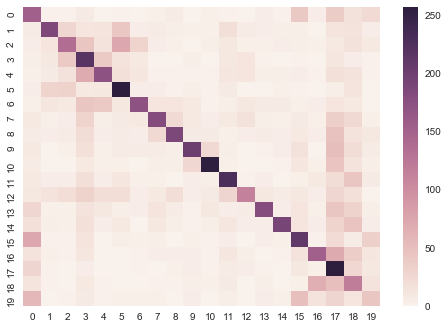

In [86]:
import seaborn

seaborn.heatmap(sklearn.metrics.confusion_matrix(answ_true, answ))

In [87]:
for i in range(20):
#sklearn.metrics.confusion_matrix(answ_true, answ)
    print(sklearn.metrics.confusion_matrix(answ_true, answ)[i], sep=' ', flush=False)

[154   2   2   8   1   2   0   3   7   1   3   2   0   5   2  42   6  38
  17  24]
[  7 186  28  13  14  43   6   7   4   3   3  19   7   6   4   4   1  14
  15   5]
[  5  13 136  44  15  74  30   5   3   1   4  11   3   3   5   4   3   9
  17   9]
[  4  10  41 218  41  15   9   0   1   4   0  11  13   2   1   2   1  12
   5   2]
[  3   8  17  70 172  18  12   2   2   2   2  12  13   4   4   6   2  18
  16   2]
[  5  30  32   9  11 256   5   5   2   4   2   8   1   0   3   2   1   4
  14   1]
[  3  12   9  44  41  11 172  13  13   9   2   4  11   8   8   3   5  13
   9   0]
[  9   3   6  31   4   8   9 181  24   9   5   9  17   4   3   8   3  35
  25   3]
[  7   5   7  22   5   7   5  26 187   8   8   3   5   7   6   9   6  48
  16  11]
[  9   1   3  18   3   7   7   7   4 202  25   4   1   2   5  17   1  52
  22   7]
[  7   1   0   9   3   3   0   4   4  27 255   3   1   1   2  12   3  45
  15   4]
[  9   5   5  19   6  12   3   3   1   6   4 228   2   6   1   3   9  22
  44   8]
[ 11

#### Проанализируем матрицу ошибок

Видно, что максимальные числа в каждой строке расположенны на диагонали, но тем не менее в матрице почти отсутствуют нули. Это значит что ошибки встречаются в классификации почти любого документа. Классификатор часто не может верно классифицировать текст  с 20-ой, 19-ой и 18-0й темой ( так как в 20-ой и 19-ой и 18-ой строке много больших чисел ) Классификатор часто путает 4ую и 5ую темы 'comp.sys.ibm.pc.hardware' и 'comp.sys.mac.hardware'. 
Если посмотреть на темы текстов, видно что многие темы похожи, например:
 'rec.sport.baseball' и 'rec.sport.hockey',
 'rec.autos', и 'rec.motorcycles' и другие.
Это значит что в этих темах будут пересекаться ключевые слова, значит наш классификатор может их путать 
 